## Refactored Capstone Project -- Zillow House Price Prediction

### Step 1. Data Exploration

In [1]:
##library  dependencies
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from numpy import sort
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import bokeh
import sklearn
import xgboost as xgb
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.mlab as mlab
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from numpy import sort
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import bokeh
import sklearn
import xgboost as xgb
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.mlab as mlab
import sqlite3
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


### 1. Import Data

In [2]:
## import properties 2016  data
prop2016= pd.read_csv('./Data/properties_2016.csv') 

C:\Users\shijie\AppData\Local\Temp\ipykernel_11112\1058548043.py:2: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  prop2016= pd.read_csv('./Data/properties_2016.csv')


In [3]:
prop2016.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [13]:
prop2016.shape

(2985217, 58)


Importing properties_2016 which has data about 29 million house properties with 58 attributes


In [15]:
## import train 2016  data
train2016=pd.read_csv('./Data/train_2016_v2.csv',parse_dates=["transactiondate"])

In [16]:
train2016.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [19]:
train2016.shape

(90275, 3)


Importing transaction data which has 90k records of the properties sold in the year 2016

### 2. Missing Values

We have seen many missing values in the last step. How many missing values are there for each feature? In fact, some features are missing nearly completely. So, we probably have to work more with the others.

In [52]:
missing_prop2016 = prop2016.isnull().sum().reset_index()
missing_prop2016.columns = ['column_name', 'missing_counts']
missing_prop2016 = missing_prop2016.loc[missing_prop2016['missing_counts']>0]
missing_prop2016['percentage'] = 100 * (missing_prop2016['missing_counts']/prop2016.shape[0])
missing_prop2016 = missing_prop2016.sort_values(by='percentage')
missing_prop2016

,column_name,missing_counts,percentage
35,rawcensustractandblock,11437,0.383121
25,longitude,11437,0.383121
24,latitude,11437,0.383121
37,regionidcounty,11437,0.383121
17,fips,11437,0.383121
33,propertylandusetypeid,11437,0.383121
52,assessmentyear,11439,0.383188
5,bedroomcnt,11450,0.383557
4,bathroomcnt,11462,0.383959
40,roomcnt,11475,0.384394


At first glance, many columns have more than 90% missing values. 

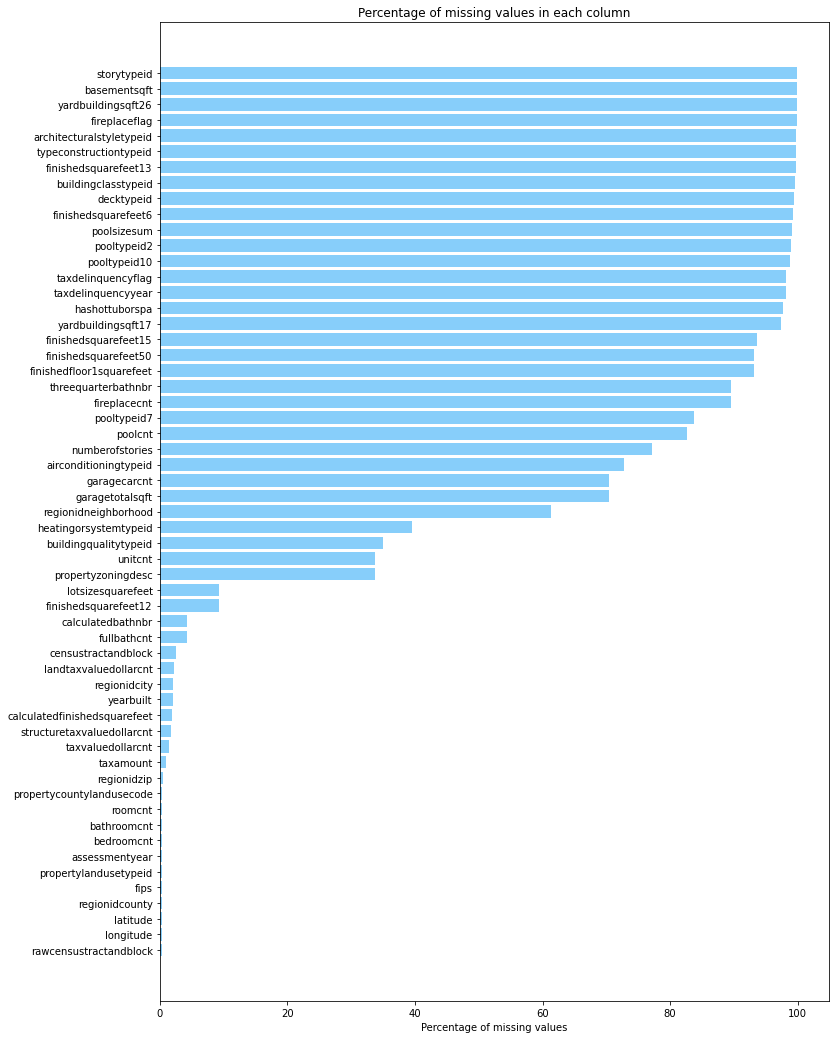

In [55]:
ind = np.arange(missing_prop2016.shape[0])
# width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_prop2016.percentage.values, color='lightskyblue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_prop2016.column_name.values, rotation='horizontal')
ax.set_xlabel("Percentage of missing values")
ax.set_title("Percentage of missing values in each column")
plt.show()

In [58]:
missing90_prop2016 = missing_prop2016.loc[missing_prop2016['missing_counts']>prop2016.shape[0]*0.9]
missing90_perc = 100 * (missing90_prop2016.shape[0]/prop2016.shape[1])
missing90_perc

34.48275862068966

34.5% of the attributes are missing more than 90% of values. 

### 3. Data Visualization

####  logerror

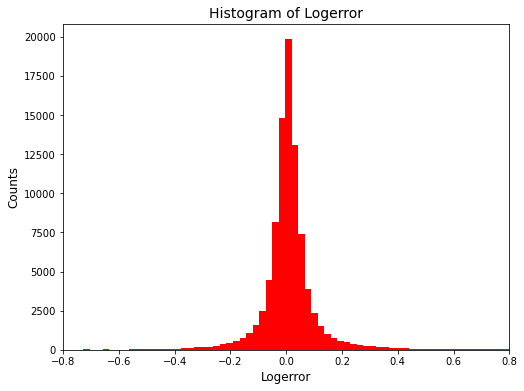

In [69]:
plt.figure(figsize=(8, 6))
plt.hist(train2016.logerror.values, bins=400, color='red')
plt.xlabel('Logerror', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Histogram of Logerror', fontsize=14)
plt.xlim(-0.8, 0.8)
plt.show()

logerror: log(Zestimate) - log(Saleprice). So a positive logerror means Zestimate is overestimating the Saleprice, a negative logerror means that Zestimate is underestimating Saleprice.

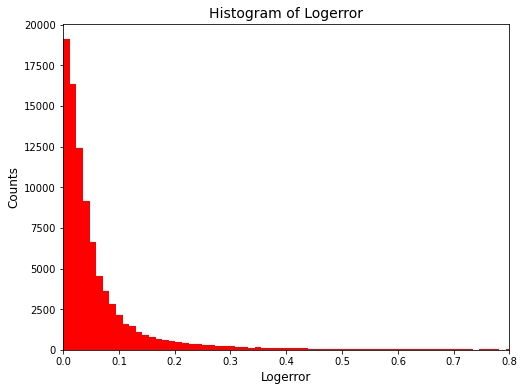

In [73]:
plt.figure(figsize=(8, 6))
plt.hist(abs(train2016.logerror.values), bins=400, color='red')
plt.xlabel('Logerror', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Histogram of Logerror', fontsize=14)
plt.xlim(0, 0.8)
plt.show()

absolute logerror: a small value means that log(Zestimate) is close to log(Saleprice). So, Zestimate predictions are close to Saleprice.

How does absolute log error change with time?


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

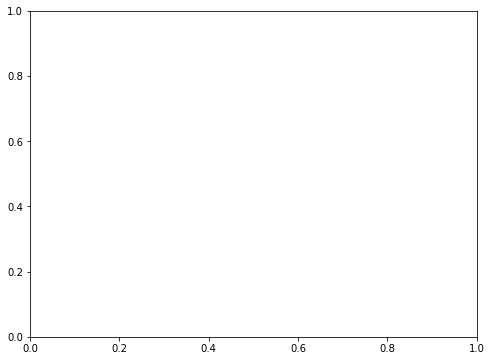

In [98]:
# train2016['transactiondate'] = pd.to_datetime(train2016['transactiondate'])
# train2016['month'] = train2016['transactiondate'].dt.month

# plt.figure(figsize=(8, 6))
# sns.lineplot(x=train2016['month'].to_numpy(), y=train2016['logerror'].to_numpy())
# plt.xlabel('Year', fontsize=12)
# plt.ylabel('Logerror', fontsize=12)
# plt.title('Logerror vs. Year', fontsize=14)
# plt.show()

plt.figure(figsize=(8, 6))
plt.plot(train2016['month'], train2016['logerror'], color='blue')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Logerror', fontsize=12)
plt.title('Logerror vs. Month', fontsize=14)
plt.grid(True)  # Add grid lines for better readability (optional)
plt.show()

#### Location

<Figure size 864x864 with 0 Axes>

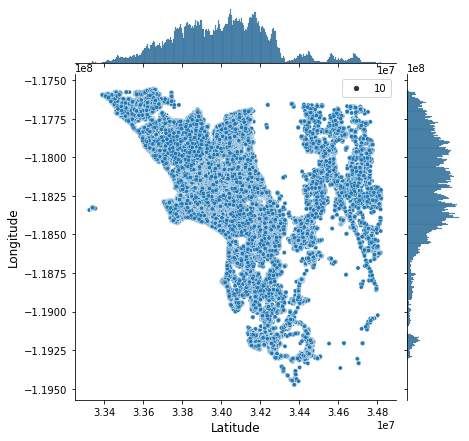

In [70]:
plt.figure(figsize=(12,12))
sns.jointplot(x=prop2016.latitude.values, y=prop2016.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [ ]:

##merge
df_train = train2016.merge(prop2016, how='left', on='parcelid')
df_train['transaction_month'] = df_train['transactiondate'].dt.month

In [3]:
color = sns.color_palette()
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

##  Logerror:
-  Target variable for this problem is "logerror" field. So let us do some analysis on this field first.

## Observation : 
-  Some outliers at both the ends.!

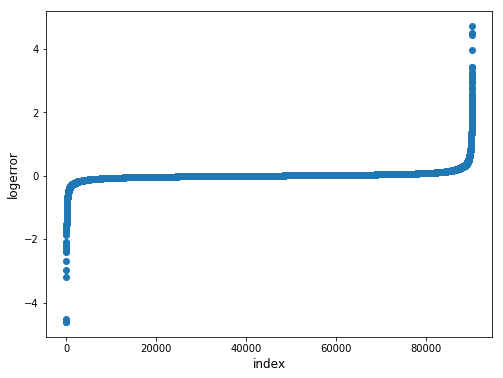

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(range(df_train.shape[0]), np.sort(df_train.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

## Transaction Date:
-  Now let us explore the date field. Let us first check the number of transactions in each month.

## Observation:
-  As we could see from the data description as well the train data has all the transactions before October 15, 2016, plus some of the transactions after October 15, 2016. So we have shorter bars in the last three months

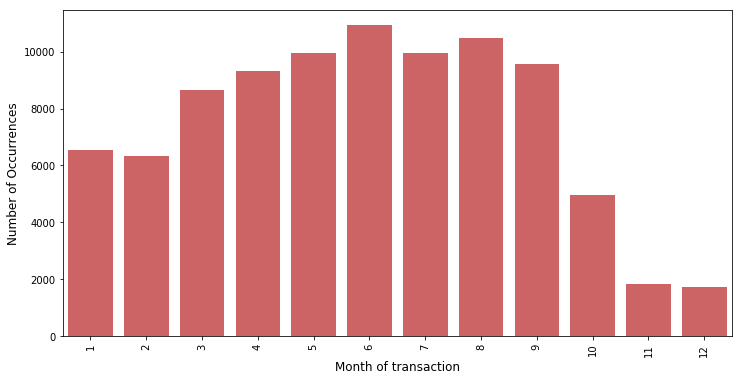

In [5]:
df_train['transaction_month'] = df_train['transactiondate'].dt.month
cnt_srs = df_train['transaction_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

## Missing Value Analysis:
    
-  There are so many NaN values in properties_2016 dataset. So let us first do some exploration on that one.

## Observation

- 35% of the attributes are missing more than 90% of values.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


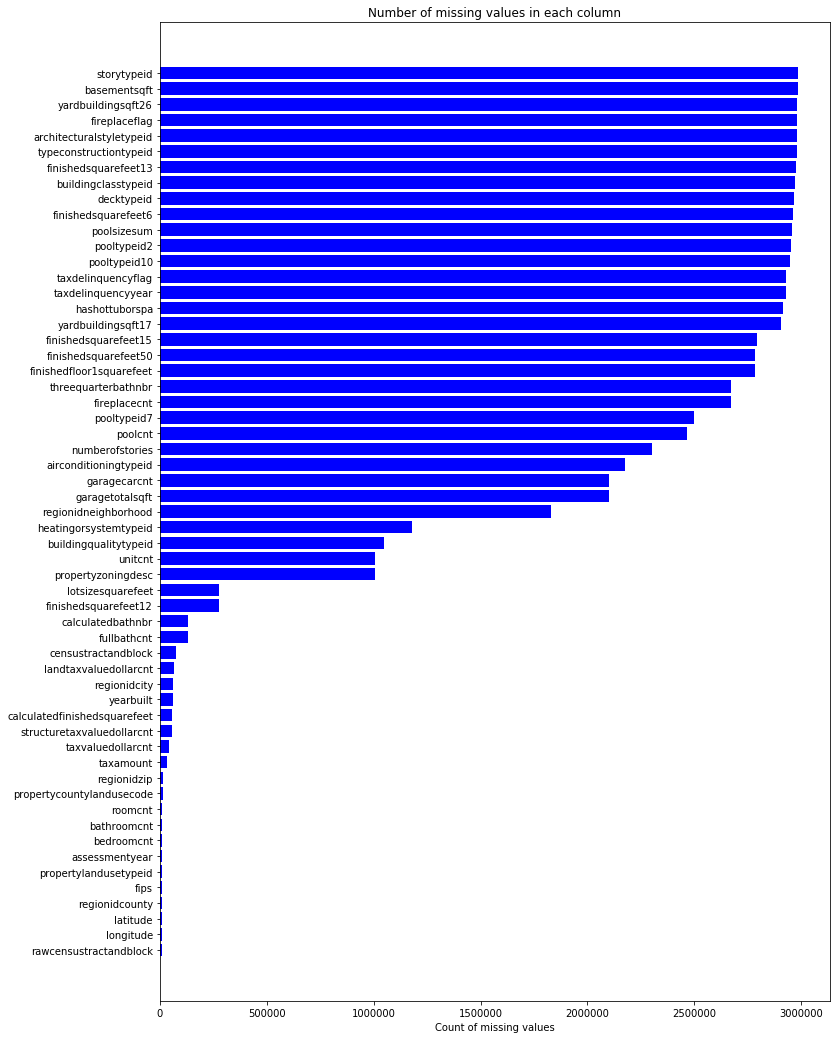

In [6]:
missing_df = prop2016.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

## Location Analysis
-  Let us explore the latitude and longitude variables to begin with.

## Observation:
-  From the data page, we are provided with a full list of real estate properties in three counties (Los Angeles, Orange and Ventura, California) data in 2016.


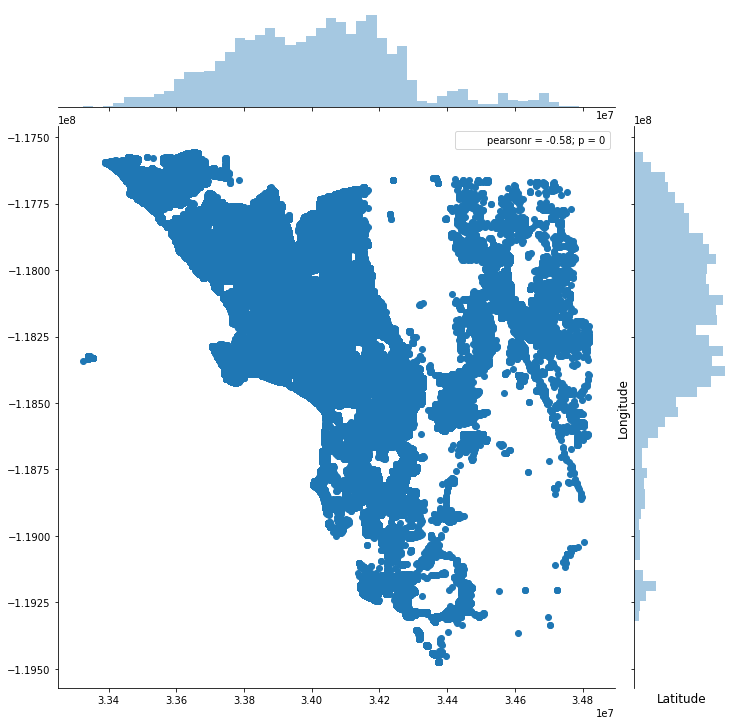

In [9]:
plt.figure(figsize=(12,12))
sns.jointplot(x=prop2016.latitude.values, y=prop2016.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

## Univariate Analysis:

-  Since there are so many variables, let us first take the 'float' variables alone and then get the correlation with the target variable to see how they are related.


## Observation

-  The correlation of the target variable with the given set of variables is low overall.

-  There are few variables at the top of this graph without any correlation values.


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


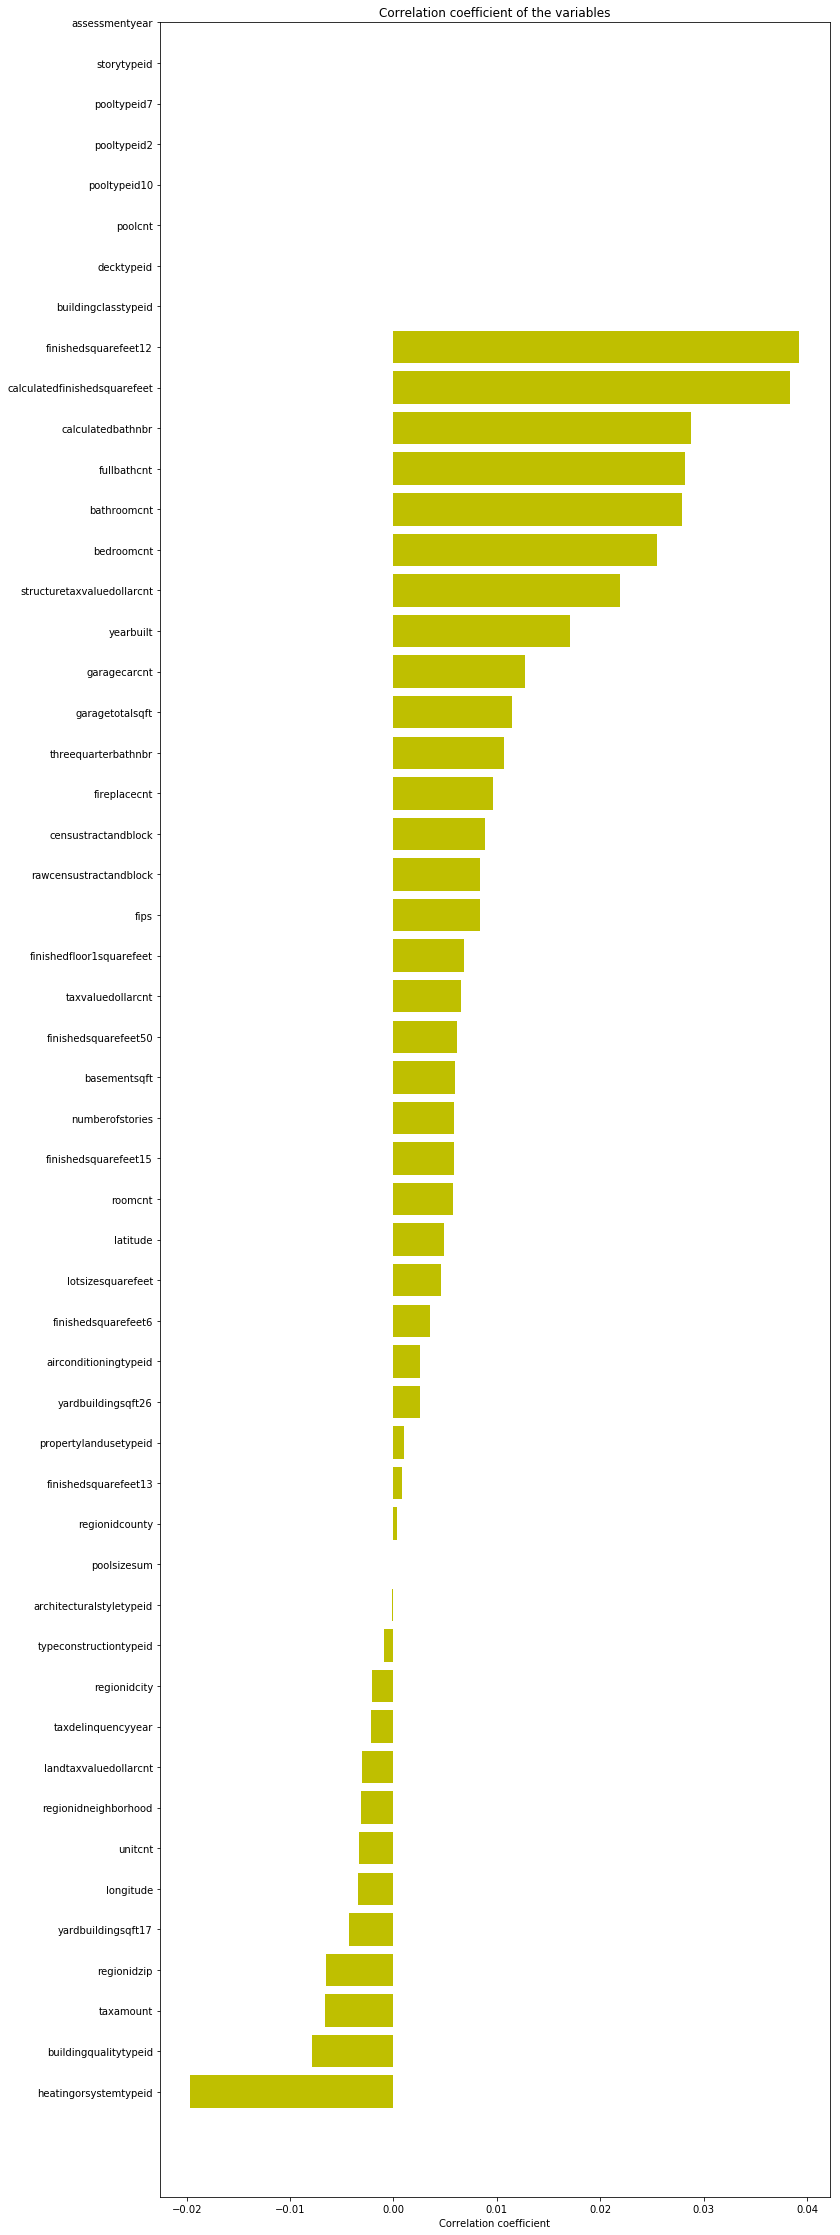

In [11]:
# Let us just impute the missing values with mean values to compute correlation coefficients #
mean_values = df_train.mean(axis=0)
df_train = df_train.fillna(mean_values, inplace=True)

# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in df_train.columns if col not in ['logerror'] if df_train[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df_train[col].values, df_train.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

### Let us take the variables with high correlation values and do some analysis on them

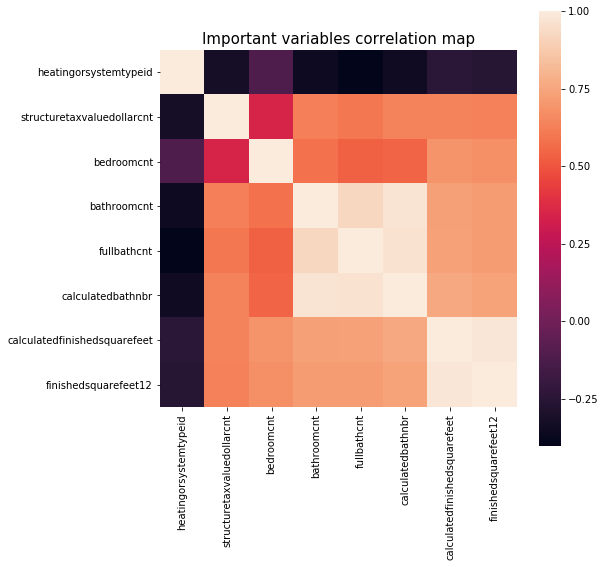

In [13]:
corr_df_sel = corr_df.loc[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel
cols_to_use = corr_df_sel.col_labels.tolist()
df_train = df_train[cols_to_use]
corrmat = df_train.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

### Exploring important attributes
- Bathroom Count

### Observation
- Most houses seems to be having 2-3 bathrooms

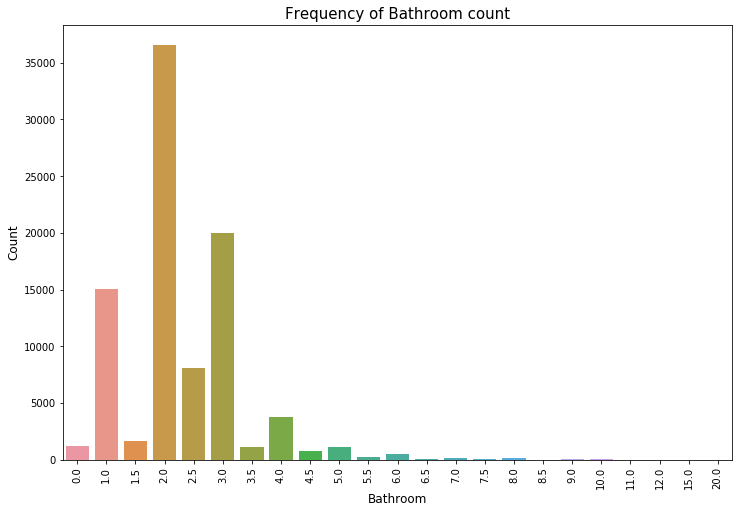

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(x="bathroomcnt", data=df_train)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bathroom', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bathroom count", fontsize=15)
plt.show()

###  logerror vs bathroom count

- Let's see how "logerror" changes with bathroom count 

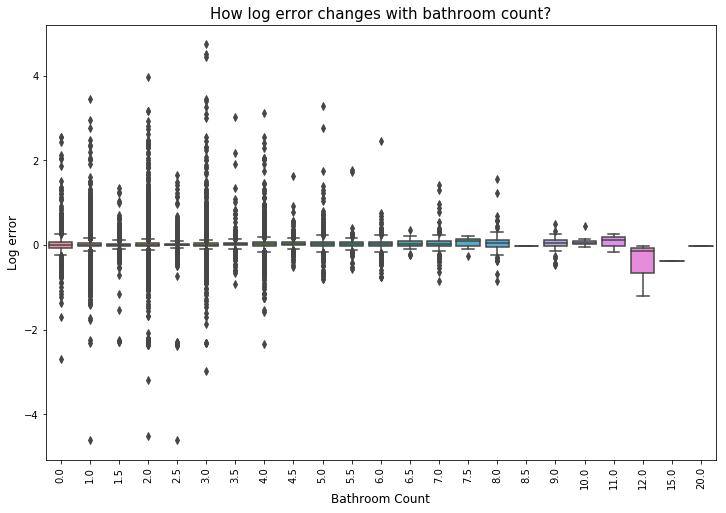

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x="bathroomcnt", y="logerror", data=df_train)
plt.ylabel('Log error', fontsize=12)
plt.xlabel('Bathroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("How log error changes with bathroom count?", fontsize=15)
plt.show()

### Exploring important attributes
- Bedroom Count

### Observation
- Most houses seems to be having 2-4 Bedroom

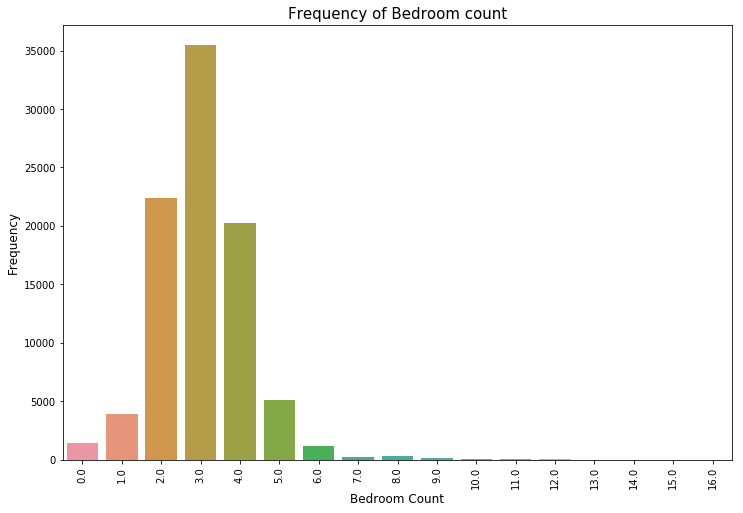

In [20]:
#Bedroom count:
plt.figure(figsize=(12,8))
sns.countplot(x="bedroomcnt", data=df_train)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bedroom count", fontsize=15)
plt.show()

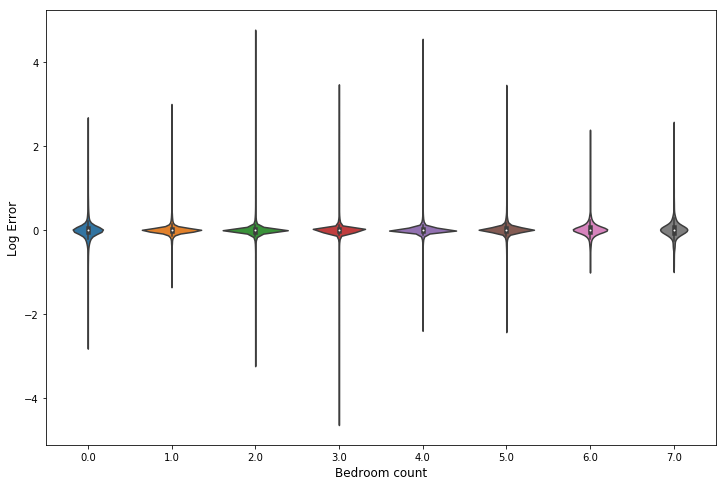

In [21]:
#
df_train['bedroomcnt'].loc[df_train['bedroomcnt']>7] = 7
plt.figure(figsize=(12,8))
sns.violinplot(x='bedroomcnt', y='logerror', data=df_train)
plt.xlabel('Bedroom count', fontsize=12)
plt.ylabel('Log Error', fontsize=12)
plt.show()

## logerror vs taxamount 

-  Let's see how "logerror" changes with taxamount

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


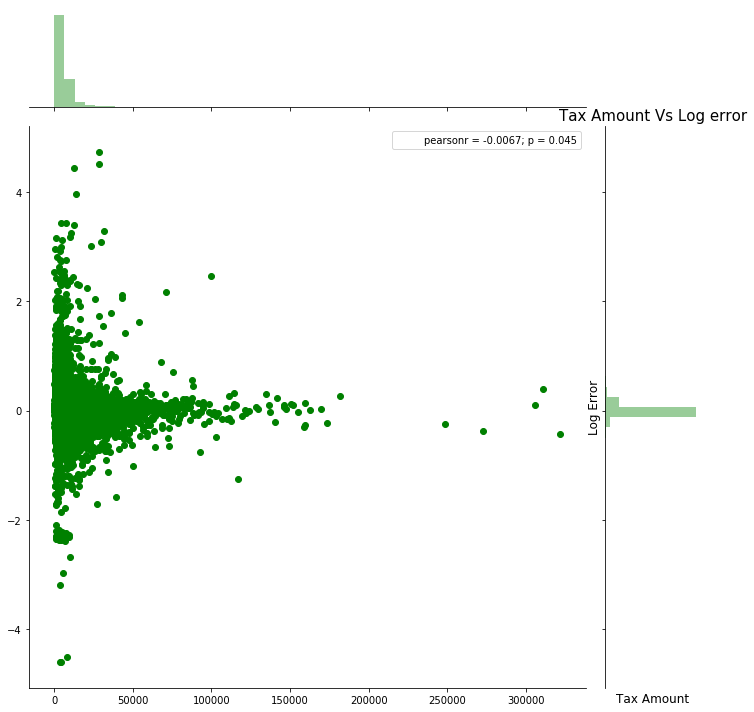

In [22]:
col = "taxamount"
ulimit = np.percentile(df_train[col].values, 99.5)
llimit = np.percentile(df_train[col].values, 0.5)
df_train[col].loc[df_train[col]>ulimit] = ulimit
df_train[col].loc[df_train[col]<llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=df_train['taxamount'].values, y=df_train['logerror'].values, size=10, color='g')
plt.ylabel('Log Error', fontsize=12)
plt.xlabel('Tax Amount', fontsize=12)
plt.title("Tax Amount Vs Log error", fontsize=15)
plt.show()

# Let us explore how the error varies with the year_built variable.

##  Observation
-  There is a minor incremental trend seen with respect to built year.

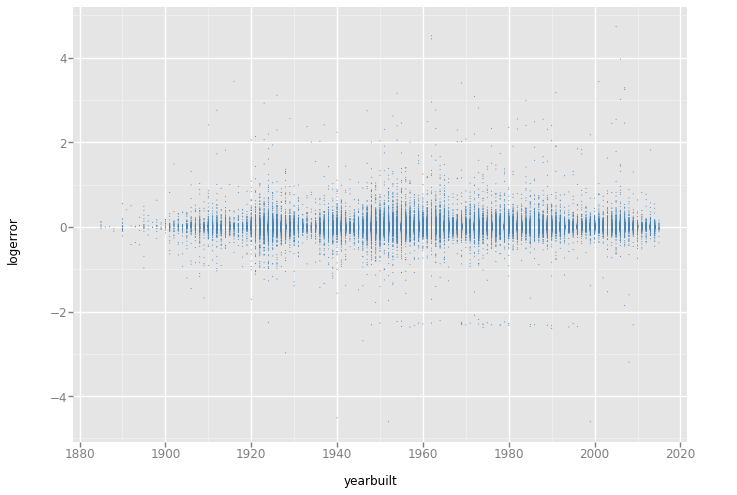

<ggplot: (-9223371865313907042)>

In [29]:
from ggplot import *
ggplot(aes(x='yearbuilt', y='logerror'), data=df_train) + geom_point(color='steelblue', size=1) 


### Now let us see how the logerror varies with respect to latitude and longitude

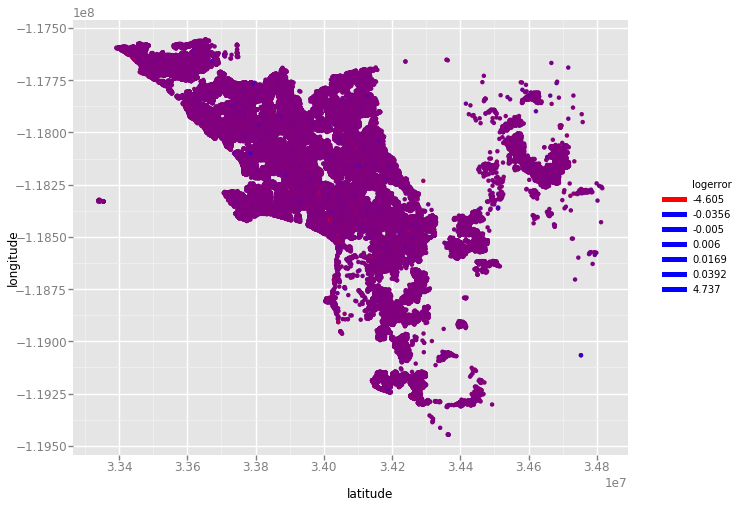

<ggplot: (-9223371865313699191)>

In [31]:
ggplot(aes(x='latitude', y='longitude', color='logerror'), data=df_train) + \
    geom_point() + \
    scale_color_gradient(low = 'red', high = 'blue')